# Mini Project : California Housing

Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        

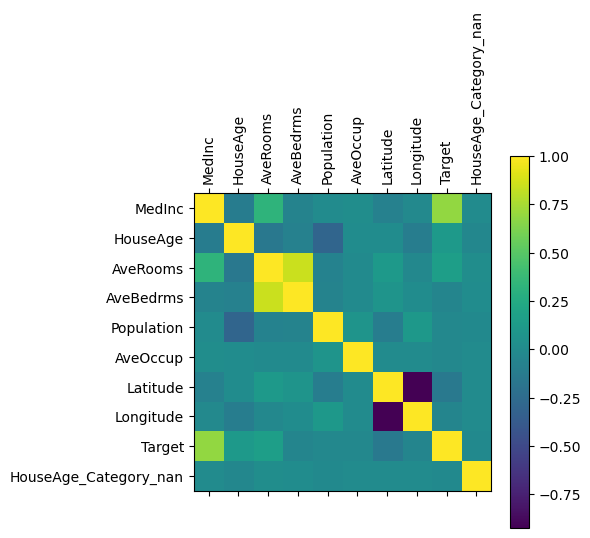


Feature Engineering:

DataFrame after all operations:
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.539668  0.784314  0.043512   0.020469    0.008941  0.001499  0.567481   
1  0.538027  0.392157  0.038224   0.018929    0.067210  0.001141  0.565356   
2  0.466028  1.000000  0.052756   0.021940    0.013818  0.001698  0.564293   
3  0.354699  1.000000  0.035241   0.021929    0.015555  0.001493  0.564293   
4  0.230776  1.000000  0.038534   0.022166    0.015752  0.001198  0.564293   

   Longitude  Target  HouseAge_Category_nan  New_Feature  
0   0.211155   4.526                    0.0     0.583181  
1   0.212151   3.585                    0.0     0.576251  
2   0.210159   3.521                    0.0     0.518785  
3   0.209163   3.413                    0.0     0.389940  
4   0.209163   3.422                    0.0     0.269310  


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['Target'] = data['target']

# Explore the Data
print("Statistical Summary:")
print(df.describe())

print("\nPreview of the Data:")
print(df.head())

print("\nMetadata:")
print(df.info())

# Preprocess the Data
print("\nCheck for Missing Data:")
missing_data = df.isnull().sum()
print(missing_data)

print("\nNormalize Continuous Variables:")
scaler = MinMaxScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

# Categorical Variables
print("\nSimulate a Categorical Variable:")


print("\nOne-Hot Encoding:")
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_columns = pd.DataFrame(encoder.fit_transform(df[['HouseAge_Category']]), columns=encoder.get_feature_names_out(['HouseAge_Category']))
df = pd.concat([df, encoded_columns], axis=1)
df = df.drop('HouseAge_Category', axis=1)

# Correlations
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

# Feature Engineering
print("\nFeature Engineering:")
df['New_Feature'] = df['MedInc'] + df['AveRooms']

# Display the DataFrame after all operations
print("\nDataFrame after all operations:")
print(df.head())
